# *Data Science (Obesity Risk Prediction)*


## Today's Outline
- Full Data Science Case-study
    - ML Prediction

## Case-study: Obesity Risk Prediction

This dataset can be found on Kaggle:
https://www.kaggle.com/competitions/playground-series-s4e2/data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, mean_squared_error ,r2_score
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Data Pre-proccesing and Exploring Data

In [2]:
data = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')

In [3]:
data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
datatest.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
m1=data.NObeyesdad.unique()

In [6]:
data.shape

(20758, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Transform Data

In [11]:
lb = LabelEncoder()

In [12]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')

In [13]:
for i in range (0 , obj.shape[1]):
    obj.iloc[ : ,i]= lb.fit_transform(obj.iloc[ : ,i])


In [14]:
obj = obj.astype("int64")

In [15]:
obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          20758 non-null  int64
 1   family_history_with_overweight  20758 non-null  int64
 2   FAVC                            20758 non-null  int64
 3   CAEC                            20758 non-null  int64
 4   SMOKE                           20758 non-null  int64
 5   SCC                             20758 non-null  int64
 6   CALC                            20758 non-null  int64
 7   MTRANS                          20758 non-null  int64
 8   NObeyesdad                      20758 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [16]:
data = pd.concat([obj,non_obj],axis=1)

In [17]:
data.NObeyesdad.unique()

array([6, 1, 0, 4, 3, 5, 2], dtype=int64)

In [18]:
obj=datatest.select_dtypes(include='object')
non_obj=datatest.select_dtypes(exclude='object')
for i in range (0 , obj.shape[1]):
    obj.iloc[ : ,i]= lb.fit_transform(obj.iloc[ : ,i])
obj = obj.astype("int64")
datatest = pd.concat([obj,non_obj],axis=1)

In [19]:
sc = StandardScaler()

In [20]:
data['Age'] = sc.fit_transform(data[['Age']])
data['Weight'] = sc.fit_transform(data[['Weight']])

In [21]:
data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721


In [22]:
sc = StandardScaler()

In [23]:
datatest['Age'] = sc.fit_transform(datatest[['Age']])
datatest['Weight'] = sc.fit_transform(datatest[['Weight']])
datatest.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.848294,1.273786,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,1.600000,-0.818988,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,1.643355,0.927432,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,1.553127,0.623672,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,1.627396,0.668336,3.000000,3.000000,2.653531,0.000000,0.741069


# Create model

In [24]:
X = data.drop(['NObeyesdad','id'], axis=1 )
y = data['NObeyesdad']
X

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,0.227725,1.766626,0.996987,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,-1.027052,1.710000,-1.436296,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,-0.657669,1.819557,0.670717,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,1.760067,1.700000,-0.165574,2.671238,1.971472,2.144838,0.000000,0.973834


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
Algorithms = ['LogisticRegression','RandomForestClassifier','DecisionTreeRegressor' ,
              'KNeighborsClassifier','XGBClassifier', 'SVC','GradientBoostingClassifier','GradientBoostingClassifier']
R2 = []
RSME = []
Accuaracy = []

In [27]:
param_dist = {"n_estimators" : randint(50,500) ,
                "max_depth" : randint(1,20)}
model = XGBClassifier()
rand_search = RandomizedSearchCV( model,param_distributions=param_dist,n_iter=5,cv=5,n_jobs=-1)
rand_search = rand_search.fit(X_train,y_train)
best_rf = rand_search.best_estimator_
print ('parm : ' , rand_search.best_params_)

parm :  {'max_depth': 2, 'n_estimators': 497}


In [28]:
k_value=[i for i in range (1,31)]
scores =[]
for k in k_value:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model,X,y,cv=5)
        
scores.append(np.mean(score))
best_index = np.argmax(scores) 
best_k = k_value[best_index]
print(best_k)

1


In [29]:
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators = 489 , max_depth = 17 )
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = KNeighborsClassifier(n_neighbors=best_k)
model6 = XGBClassifier(n_estimators = 279 , max_depth = 2 )
model7 = SVC()
model8 = GradientBoostingClassifier(n_estimators = 489 , max_depth = 17 )

In [30]:
def pred(model):
    model.fit(X_train , y_train)
    y_predict= model.predict(X_test)
    r2 = r2_score( y_predict ,y_test)
    R2.append(r2)
    accuracy = accuracy_score(y_predict, y_test)
    Accuaracy.append(accuracy)
    MSEValue = mean_squared_error(y_test,y_predict)
    RSME.append( MSEValue)
    cm=confusion_matrix(y_predict, y_test , normalize='true') 
    ConfusionMatrixDisplay(confusion_matrix=cm , display_labels = model.classes_ ).plot()
    print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       576
           1       0.68      0.70      0.69       605
           2       0.80      0.77      0.78       563
           3       0.97      0.95      0.96       668
           4       1.00      0.99      1.00       807
           5       0.59      0.64      0.62       446
           6       0.61      0.64      0.63       487

    accuracy                           0.81      4152
   macro avg       0.79      0.78      0.78      4152
weighted avg       0.81      0.81      0.81      4152



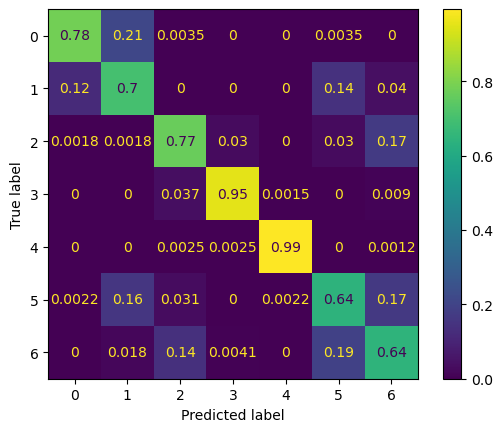

In [31]:
pred(model1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       509
           1       0.89      0.84      0.86       658
           2       0.86      0.89      0.88       527
           3       0.98      0.97      0.97       659
           4       1.00      1.00      1.00       805
           5       0.76      0.78      0.77       472
           6       0.80      0.79      0.80       522

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



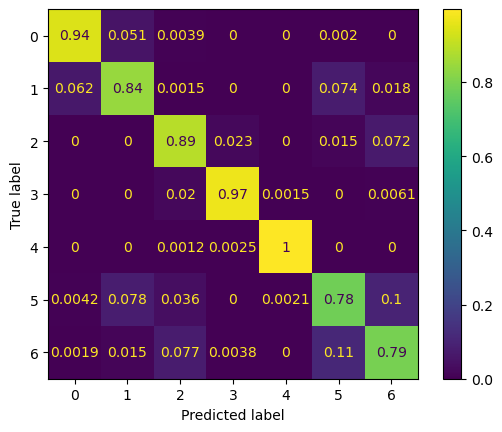

In [32]:
pred(model2)

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       641
           1       0.47      0.65      0.54       450
           2       0.61      0.37      0.46       897
           3       0.93      0.71      0.81       858
           4       1.00      0.96      0.98       832
           5       0.30      0.61      0.40       239
           6       0.24      0.53      0.33       235

    accuracy                           0.66      4152
   macro avg       0.63      0.65      0.61      4152
weighted avg       0.74      0.66      0.68      4152



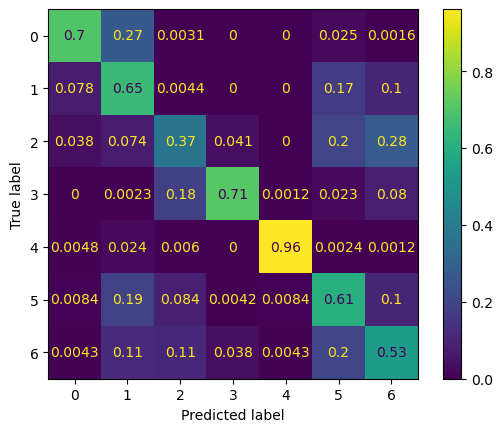

In [33]:
pred(model3)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       521
           1       0.77      0.79      0.78       609
           2       0.84      0.82      0.83       556
           3       0.95      0.95      0.95       654
           4       1.00      0.99      0.99       808
           5       0.66      0.65      0.65       493
           6       0.71      0.71      0.71       511

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



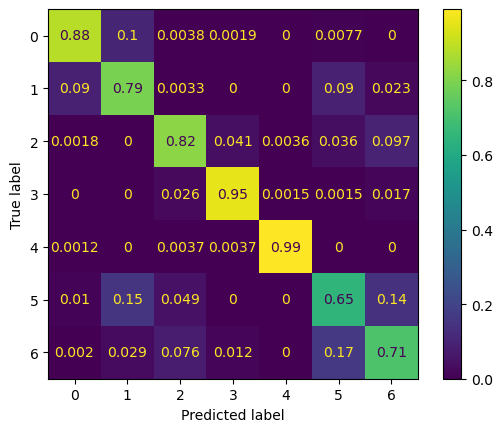

In [34]:
pred(model4)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       523
           1       0.61      0.59      0.60       646
           2       0.73      0.71      0.72       553
           3       0.93      0.94      0.94       650
           4       1.00      1.00      1.00       805
           5       0.48      0.49      0.48       478
           6       0.55      0.57      0.56       497

    accuracy                           0.75      4152
   macro avg       0.72      0.73      0.72      4152
weighted avg       0.75      0.75      0.75      4152



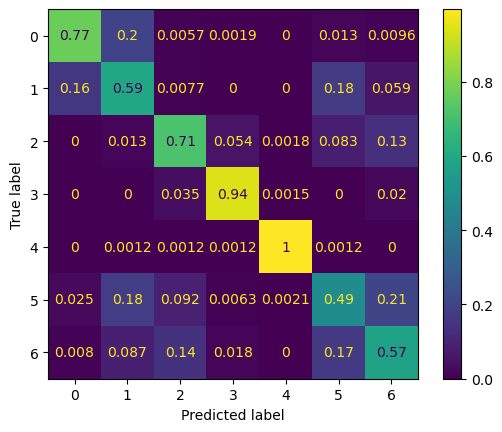

In [35]:
pred(model5)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       516
           1       0.90      0.88      0.89       638
           2       0.87      0.88      0.87       536
           3       0.97      0.97      0.97       654
           4       1.00      1.00      1.00       805
           5       0.79      0.78      0.78       487
           6       0.80      0.80      0.80       516

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



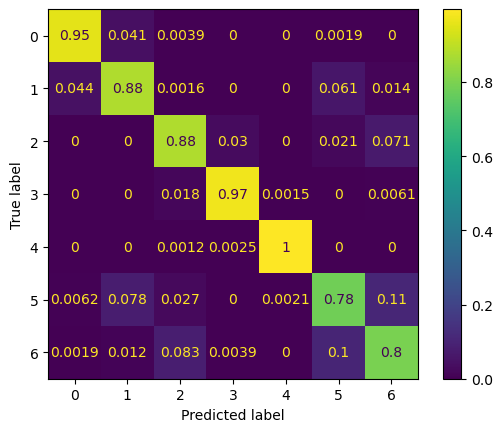

In [36]:
pred(model6)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       564
           1       0.77      0.81      0.79       593
           2       0.84      0.82      0.83       557
           3       0.97      0.97      0.97       659
           4       1.00      1.00      1.00       804
           5       0.66      0.69      0.67       463
           6       0.69      0.70      0.69       512

    accuracy                           0.85      4152
   macro avg       0.84      0.83      0.84      4152
weighted avg       0.85      0.85      0.85      4152



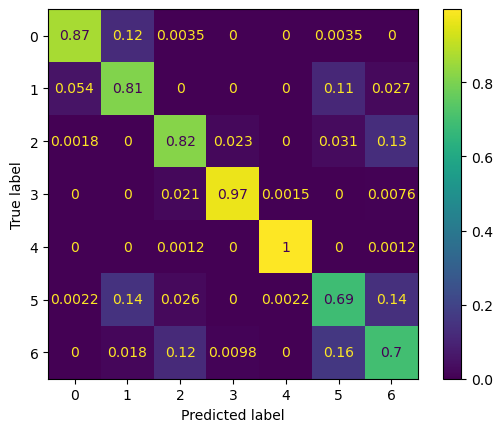

In [37]:
pred(model7)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       516
           1       0.84      0.83      0.83       633
           2       0.86      0.86      0.86       540
           3       0.96      0.97      0.97       652
           4       1.00      0.99      1.00       807
           5       0.74      0.72      0.73       495
           6       0.78      0.78      0.78       509

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



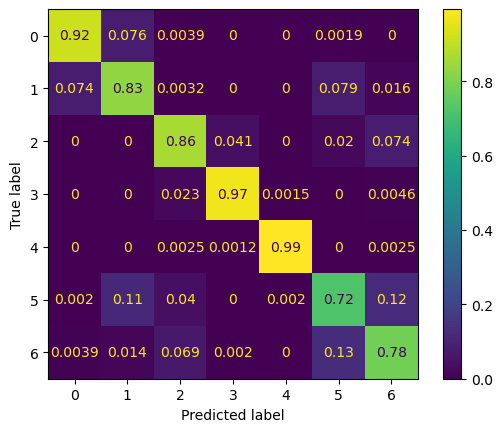

In [38]:
pred(model8)

In [39]:
pd.DataFrame({'Algorithms': Algorithms ,'R2' : R2 , 'RSME' : RSME,'Accuaracy':Accuaracy})

,Algorithms,R2,RSME,Accuaracy
0,LogisticRegression,0.551909,1.631021,0.805395
1,RandomForestClassifier,0.753607,0.897881,0.897881
2,DecisionTreeRegressor,-0.043976,2.934008,0.663054
3,KNeighborsClassifier,0.636586,1.318160,0.845135
4,XGBClassifier,0.341548,2.383189,0.749759
5,SVC,0.768123,0.844894,0.904143
6,GradientBoostingClassifier,0.634913,1.342004,0.852360
7,GradientBoostingClassifier,0.732494,0.971821,0.880539


In [40]:
datatest.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.848294,1.273786,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,1.600000,-0.818988,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,1.643355,0.927432,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,1.553127,0.623672,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,1.627396,0.668336,3.000000,3.000000,2.653531,0.000000,0.741069


In [41]:
testx=datatest.drop('id',axis=1)

In [42]:
prex=model6.predict(testx)

In [43]:
sub=pd.DataFrame({"id":datatest['id'],"NObeyesdad":prex})

In [44]:
m2 = sub['NObeyesdad'].unique()

In [45]:
m3=dict(zip(m1,m2))

In [46]:
sub['NObeyesdad'] = lb.inverse_transform(prex)

ValueError: y contains previously unseen labels: [5 6]

In [47]:
sub.to_csv("submission.csv",index=False)

## End